# Question 1: 


The dataset has been taken from the following link:
http://networkrepository.com/fb-pages-food.php
The dataset contains 620 nodes and 2102 edges where nodes represnts the faceboook pages and edges represnets the mutual liked pages.

In [1]:
# Reading data from file containing source and destination nodes
import numpy as np
file1=open('fb-pages-food.edges',"r+")
file_read1=file1.read()



Taking the data line by line and appending source nodes into source_list and destination nodes into dest_list

In [2]:
details=file_read1.split("\n")
#Pre - processing the dataset and creation of adjacency matrix and adjacency list
details=details[:-1]
source_list,dest_list=[],[]
for d in details:
    node=d.split(',')
    source_list.append(int(node[0]))
    dest_list.append(int(node[1]))
  

Getting unique source and destination nodes

In [3]:

#getting unique source and destination ids
unique_source_list=list(np.unique(np.array(source_list)))

unique_dest_list=list(np.unique(np.array(dest_list)))

As the given node ids are not in sequential form, I have created a mapping of nodes which gives index to each of the nodes.

In [78]:
k=0
nodes_mapping={}

#giving indices or ids to all the nodes
for i in unique_source_list:
    nodes_mapping[i]=k
    k+=1


for j in unique_dest_list:
    if j not in unique_source_list:
        nodes_mapping[j]=k
        k+=1
        
# print(nodes_mapping)

In [5]:
print("Total nodes: ", len(nodes_mapping))
print("Total edges: ",len(source_list))


Total nodes:  620
Total edges:  2102


Creation of Adjacency Matrix and Edge list. Each cell in the adjacency matrix contains 1 where and edge is present etween two nodes. Edge list contains tuples of source and destination node.

In [6]:
print("total nodes : ",len(nodes_mapping))
nodes=len(nodes_mapping)
edge_list=[]
 # creation of adjacency matrix       
adjacency_matrix=np.zeros((nodes,nodes))

for id1,id2 in zip(source_list,dest_list): 
    id1_map=nodes_mapping[id1]
    id2_map=nodes_mapping[id2]
    edge_list.append((id1_map,id2_map))
    adjacency_matrix[id1_map][id2_map]=1
    adjacency_matrix[id2_map][id1_map]=1
    


total nodes :  620


Creating adjacency list where key represent node index and value represents their neighbouring nodes

In [77]:

adjacency_list={}
it=0

for row in adjacency_matrix:
    temp=[]
    for v in range(len(row)):
        if row[v]==1:
            temp.append(v)
    adjacency_list[it]=temp
    it+=1


# print(adjacency_list)

For part b, I have attached a png file of the network.
Part c: As seen from the below cell that the number of edges present in the network is much much less than the maximum possible number of edges of the network and most of the values in the adjacency matrix is 0,so we can conclude that the network is sparse network. Also from the visualization using cytoscape we can see that the network is sparse.

<img src="fb_food1.csv.png" width="800" height="400">


In [8]:
total_edges=(620*619)/2
print("Maximum number of edges in the network: ", total_edges)
print("Total edges present in the network : ",len(source_list))

Maximum number of edges in the network:  191890.0
Total edges present in the network :  2102


Calculating degree of each node and storing it in a dictionary called degree_dict where key represents node id and value represents its respective degree. The degree of node 'n' is calculated by counting all 1s of the nth row.
Average degree is calculated by adding all the degrees and dividing it by total number of nodes.
Average degree is coming out to be 6.7

In [9]:
degrees=[]
#degree corresponding to each node
degree_dict={}
c=0
for i in adjacency_matrix:
    deg=list(i).count(1)
    degrees.append(deg)
    degree_dict[c]=deg
    c=c+1

print("Average degree of the network is :",sum(degrees)/620 )
# print((2*2102)//(620))

Average degree of the network is : 6.762903225806451


Calculating degree distribution by taking (number of nodes having degree k/ total number of nodes in the network)

In [76]:
degree_distribution1={}

for degree in degrees:
    if degree not in degree_distribution1.keys():
        prob=degrees.count(degree)/620
        degree_distribution1[degree]=prob

print("Maximum degree is: ",max(degrees))
print("Minimum degree is: ",min(degrees))

Maximum degree is:  224
Minimum degree is:  151


Plotting normal degree distribution. In X-axis we have degrees and in Y-axis we have P(degree)=(number of nodes having degree k/ total number of nodes in the network)

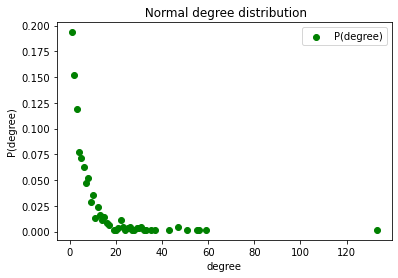

In [11]:
import matplotlib.pyplot as plt
plot_x=list(degree_distribution1.keys())
plot_y=list(degree_distribution1.values())

indexes=np.argsort(plot_x)
x,y=[],[]

for index in indexes:
    x.append(plot_x[index])
    y.append(plot_y[index])

plt.figure()
plt.title(" Normal degree distribution")
plt.xlabel("degree")
plt.ylabel("P(degree)")
plt.scatter(x, y,c='green',label='P(degree)')
plt.legend()
plt.show()

Calculating Pmax for scaled degree distribution. After calculating Pmax I have divided all the probabilities with Pmax to get scaled degree distribution.

In [12]:
pmax=max(list(degree_distribution1.values()))
print("Pmax is: ",pmax)
scaled_degree_distribution={}
for i in degree_distribution1:
    scaled_degree_distribution[i]=degree_distribution1[i]/pmax
#     print(i,degree_distribution1[i])

Pmax is:  0.1935483870967742


Plotting Scaled Degree Distribution

Maximum degree is:  133
Minimum degree is:  1


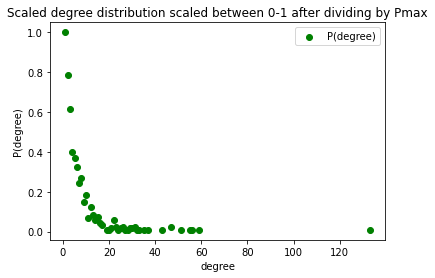

In [13]:
import matplotlib.pyplot as plt
plot_x1=list(scaled_degree_distribution.keys())
plot_y1=list(scaled_degree_distribution.values())

indexes=np.argsort(plot_x1)
x1,y1=[],[]
print("Maximum degree is: ",max(degrees))
print("Minimum degree is: ",min(degrees))
for index in indexes:
    x1.append(plot_x1[index])
    y1.append(plot_y1[index])

plt.figure()
plt.title("Scaled degree distribution scaled between 0-1 after dividing by Pmax")
plt.xlabel("degree")
plt.ylabel("P(degree)")
plt.scatter(x1, y1,c='green',label='P(degree)')
plt.legend()
plt.show()

Finding shortes path between two nodes using breadth first search algorithm and storing shortest path of each pair of nodes in list shortest_path.

In [14]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
shortest_paths=[]
def BFS_for_finding_Shortest_path(source, destination): 
    visited = [] 
    #storing source node in a queue
    queue = [[source]] 

    if source == destination: 
        shortest_paths.append(0)
        return 
    #checking while queue is not empty
    while queue: 
        visited_path = queue.pop(0) 
        vertex = visited_path[-1]  
        if vertex not in visited: 
            neighbouring_nodes = adjacency_list[vertex] 

            for neighbour in neighbouring_nodes: 
                new_visited_path = list(visited_path) 
                new_visited_path.append(neighbour) 
                queue.append(new_visited_path) 
                  
                # Condition to check if the neighbour node is the destination node 
                if neighbour == destination: 
                    shortest_paths.append(len(new_visited_path)-1)
                    return
            visited.append(vertex) 
    print("Path does not exists") 
    return 

In [15]:
node_list=[]
for a in adjacency_list:
    node_list.append(a)
    
for i in range(len(node_list)):
    for j in range(i+1,len(node_list)):
        BFS_for_finding_Shortest_path(node_list[i], node_list[j])
        

Calculating average path length and Diameter of the network. 

In [16]:
total_edges=(620*619)/2
print("average path length is: ", sum(shortest_paths)/total_edges)
print("Longest Shortest path or diameter of the network is: ", max(shortest_paths))

average path length is:  5.088696649121893
Longest Shortest path or diameter of the network is:  17


Calculating clustering coefficient of a node n = (number of edges between neighbors of the node n)/ (maximum possible edges between neighbors of node n). Clustering coefficient ofeach node is stored in a list clustering coeff and then average clustering coefficient is calculted which comes out to be 0.33 which can be verified by visiting the website of the given dataset.

In [29]:

clustering_coeff=[]
for i in adjacency_list:
    neighbors=adjacency_list[i]
    count=0
    n_=len(neighbors)
    max_neigh_edges=(n_*(n_-1))/2
#     print(max_neigh_edges)
    for n1 in range(len(neighbors)):
        for n2 in range(n1+1,len(neighbors)):
            if (neighbors[n1],neighbors[n2]) in edge_list or (neighbors[n2],neighbors[n1]) in edge_list:
                count+=1
    if max_neigh_edges!=0:
        coeff=count/max_neigh_edges
        clustering_coeff.append(coeff)
                

In [30]:
print("Average Clustering coefficient is :",sum(clustering_coeff)/620)

Average Clustering coefficient is : 0.3339835724796914


# Question 2


The dataset for this question is taken from the site https://snap.stanford.edu/data/wiki-Vote.html which contains 7114 nodes and 103684 directed edges. The dataset contains Wikipedia voting data.  Nodes in the network represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j.

In [31]:
import numpy as np
#Reading data

file2=open('Wiki-Vote.txt',"r+")
file_read2=file2.read()


Pre - processing the dataset and creation of adjacency matrix and adjacency list
Taking the data line by line and appending source nodes into source_list1 and destination nodes into dest_list1

In [32]:
details2=file_read2.split("\n")
details2=details2[4:-1]
source_list1,dest_list1=[],[]


#storing source nodes to ids_from and destination nodes to ids_t

for d in details2:
    node1,node2=d.split("\t")
    source_list1.append(int(node1))
    dest_list1.append(int(node2))
    
    
    
    


getting unique source and destination ids

In [33]:

unique_source_list1=list(np.unique(np.array(source_list1)))

unique_dest_list1=list(np.unique(np.array(dest_list1)))

As the given node ids are not in sequential form, I have created a mapping of nodes which gives index to each of the nodes.

In [34]:
nodes_mapping1={}
k=0

#giving indices or ids to all the nodes
for i in unique_source_list1:
    nodes_mapping1[i]=k
    k+=1


for j in unique_dest_list1:
    if j not in unique_source_list1:
        nodes_mapping1[j]=k
        k+=1
        

In [35]:
print("total nodes: ", len(nodes_mapping1))
print("Total edges: ",len(dest_list1))

total nodes:  7115
Total edges:  103689


Creation of adjacency matrix where each cell in the adjacency matrix contains 1 where and edge is present from node i to node j
Creation of Adjacency Matrix :
1. Initialize a matrix of zeros adjacency_matrix of size (n-1,n-1) , where n = 7114.
2. For each row i in adjacency_matrix do step 3 & 4.
3. For each col j in adjacency_matrix:
4. If adjacanecy_matrix[i][j] has an edge in the preprocessed dataset, do
adjacency_matrix[i][j] = 1
Note : In this way, at the end we can say that if adjacency_matrix[row][col] = 1, for
some row, col in range (0,n-1) that there is an directed edge from node id row to
node id col.

In [36]:
print("total nodes : ",len(nodes_mapping1))
nodes1=len(nodes_mapping1)

    
adjacency_matrix1=np.zeros((nodes1,nodes1))

for id1,id2 in zip(source_list1,dest_list1): 
    id1_map=nodes_mapping1[id1]
#     print(id1," ",id1_map)
    id2_map=nodes_mapping1[id2]
#     print(id2," ", id2_map)
    adjacency_matrix1[id1_map][id2_map]=1

total nodes :  7115


Calculating indegree by counting row containing values 1 and outdegree by counting columns containing values 1. After that averagte in degree and outdegree are calcuated. 

In-degree : In-degree for a node N is defined as the total number of nodes which have
an edge coming to the node N.
Out-degree : Out-degree for a node N is defined as the total number of nodes which
have an edge coming from node N.

In directed graph, Average In- degree = Average Out-degree = total number of
edges / total number of nodes.

Or alternatively, we can find the average - in degree as sum of all the in-degrees for all
nodes / total number of in-degrees and average - out degree as sum of all the
out-degrees for all nodes / total number of out-degrees.

In code, average - in degree and average out-degree from both the alternatives
mentioned above are calculated.
Average in -degree = 14.57
Average out -degree = 14.57


In [37]:
in_degrees,out_degrees=[],[]

for row in adjacency_matrix1:
    out_degrees.append(list(row).count(1))

trans=adjacency_matrix1.T

for col in trans:
    in_degrees.append(list(col).count(1))
    



In [38]:
print("Average In- degree = Average Out-degree = total number of edges / total number of nodes." ,(103684)/7115)
print("Average_in_degree : ",np.array(in_degrees).mean() )
print("Average_out_degree : ",np.array(out_degrees).mean())

Average In- degree = Average Out-degree = total number of edges / total number of nodes. 14.57259311314125
Average_in_degree :  14.573295853829936
Average_out_degree :  14.573295853829936


Degree distribution is defined as the plot of number of degrees vs the number of nodes
having a degree.
Alternatively, it can also be defined as the plot of number of degrees
vs the probability of a node having a particular degree.
As in directed graph, we have in-degree and out-degree, plots for both in-degree and
out-degree are shown below

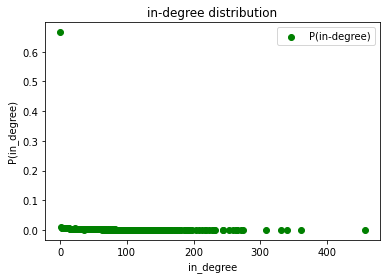

In [39]:
import matplotlib.pyplot as plt
degrees=[]

for in_d,out_d in zip(in_degrees,out_degrees):
    degrees.append(in_d+out_d)

in_degree_distribution={}

for degree in in_degrees:
    if degree not in in_degree_distribution.keys():
        in_degree_distribution[degree]=in_degrees.count(degree)/nodes1
# print(in_degree_distribution)

plot_x=list(in_degree_distribution.keys())
plot_y=list(in_degree_distribution.values())

indexes=np.argsort(plot_x)
x,y=[],[]

for index in indexes:
    x.append(plot_x[index])
    y.append(plot_y[index])

plt.figure()
plt.title("in-degree distribution")
plt.xlabel("in_degree")
plt.ylabel("P(in_degree)")
plt.scatter(x, y,c='green',label='P(in-degree)')
plt.legend()
plt.show()

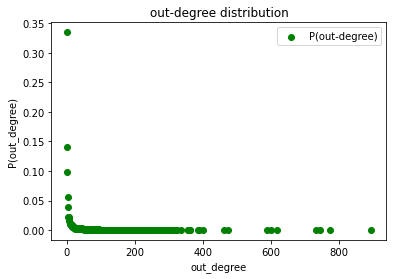

In [40]:
out_degree_distribution={}

for degree in out_degrees:
    if degree not in out_degree_distribution.keys():
        out_degree_distribution[degree]=out_degrees.count(degree)/nodes1


plot_x=list(out_degree_distribution.keys())
plot_y=list(out_degree_distribution.values())

indexes=np.argsort(plot_x)
x,y=[],[]

for index in indexes:
    x.append(plot_x[index])
    y.append(plot_y[index])



plt.figure()
plt.title("out-degree distribution")
plt.xlabel("out_degree")
plt.ylabel("P(out_degree)")
plt.scatter(x, y,c='green',label='P(out-degree)')
plt.legend()
plt.show()

# Question 3


The dataset for this question has been taken form the following website:

https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html

This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin Alpha. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin Alpha rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. 

In this question I have replaced all the negative weights by 0. 


In [44]:
import numpy as np

#reading data
file3=open('soc-sign-bitcoinalpha.csv',"r+")
file_read3=file3.read()



storing source nodes to souce_list2 and destination nodes to dest_list2

In [45]:
details3=file_read3.split("\n")

details3=details3[:-1]
source_list2,dest_list2,rating=[],[],[]


for d in details3:
    id1=d.split(',')
    source_list2.append(int(id1[0]))
    dest_list2.append(int(id1[1]))
    rating.append(int(id1[2]))

getting unique source and destination ids

In [46]:

unique_source_list2=list(np.unique(np.array(source_list2)))

unique_dest_list2=list(np.unique(np.array(dest_list2)))

As the given node ids are not in sequential form, I have created a mapping of nodes which gives index to each of the nodes.

In [47]:
nodes_mapping2={}
k=0

#giving indices or ids to all the nodes
for i in unique_source_list2:
    nodes_mapping2[i]=k
    k+=1


for j in unique_dest_list2:
    if j not in unique_source_list2:
        nodes_mapping2[j]=k
        k+=1
        

In [48]:
print("total nodes: ", len(nodes_mapping2))
print("Total edges: ",len(dest_list2))

total nodes:  3783
Total edges:  24186


Creation of Adjacency Matrix and Edge list. Each cell in the adjacency matrix contains rating given by mutual users. Edge list contains tuples of source and destination node.

In [49]:

nodes2=len(nodes_mapping2)
edge_list2=[]
 # creation of adjacency matrix and adjacency list       
adjacency_matrix2=np.zeros((nodes2,nodes2))

for id1,id2,rate in zip(source_list2,dest_list2,rating): 
    id1_map=nodes_mapping2[id1]
    id2_map=nodes_mapping2[id2]
    if(rate<0):
        rate=0
#     print(id1_map, id2_map,rate)
    edge_list2.append((id1_map,id2_map))
    adjacency_matrix2[id1_map][id2_map]=rate
    adjacency_matrix2[id2_map][id1_map]=rate
    
# print(len(edge_list))

Creating adjacency list where key represent node index and value represents their neighbouring nodes

In [50]:
adjacency_list2={}
it=0

for row in adjacency_matrix2:
    temp=[]
    for v in range(len(row)):
        if row[v]!=0:
            temp.append(v)
    adjacency_list2[it]=temp
    it+=1


# In this question I am defining degree of a node n= sum of weights of edges present between node n and its neighbouring nodes.

In [51]:
degrees1=[]
#degree corresponding to each node
degree_dict1={}
itr=0
for row in adjacency_matrix2:
    deg=sum(list(row))
#     print(deg)
    degrees1.append(deg)
    degree_dict1[itr]=deg
    itr=itr+1
    


In [52]:
print("Average degree of the network is :",sum(degrees1)/3783 )
# print("Average degree using 2*Edges/Nodes is : ",(2*24186)/(3783))

Average degree of the network is : 12.962199312714777


Plotting weighted degree distribution. In X- axis we have weighted degree and in Y-axis we have Probability of a node having weighted degree w/ Total number of nodes

In [53]:
degree_distribution2={}

for degree in degrees1:
    if degree not in degree_distribution2.keys():
        prob=degrees1.count(degree)/3783
        degree_distribution2[degree]=prob

Maximum degree is:  666.0


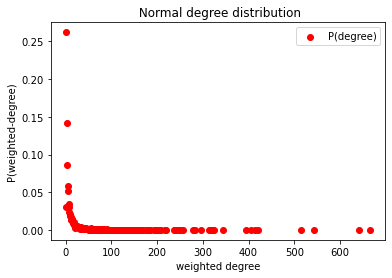

In [55]:
import matplotlib.pyplot as plt
plot_x=list(degree_distribution2.keys())
plot_y=list(degree_distribution2.values())

indexes=np.argsort(plot_x)
x,y=[],[]
print("Maximum degree is: ",max(degrees1))
# print("Minimum degree is: ",min(degrees1))
for index in indexes:
    x.append(plot_x[index])
    y.append(plot_y[index])

plt.figure()
plt.title(" Normal degree distribution")
plt.xlabel("weighted degree")
plt.ylabel("P(weighted-degree)")
plt.scatter(x, y,c='red',label='P(degree)')
plt.legend()
plt.show()

Defining new Clustering Coefficient of a node n = (sum of weights of edges present between neighbors of node n)/ (weighted_degree_of_node_n)(weighted_degree_of_node_n-1)/2

In [75]:
clustering_coeff1=[]

for i in adjacency_list2:
    neighbors=adjacency_list2[i]
    weighted_sum_of_neighbor_edges=0
    n=degree_dict1[i]
    weighted_degree_of_node=(n*(n-1))/2
    for n1 in range(len(neighbors)):
        for n2 in range(n1+1,len(neighbors)):
#             print(neighbors[n1],neighbors[n2])
            if (neighbors[n1],neighbors[n2]) in edge_list2 or (neighbors[n2],neighbors[n1]) in edge_list2:
                weighted_sum_of_neighbor_edges=weighted_sum_of_neighbor_edges+adjacency_matrix2[n1][n2]
#     print("weighted sum for ",i ," th node is: ",weighted_sum_of_neighbor_edges)
    if weighted_degree_of_node!=0:
        coeff=weighted_sum_of_neighbor_edges/weighted_degree_of_node
        clustering_coeff1.append(coeff)
    else:
        clustering_coeff1.append(0)
                

Saving CLustering coefficients in pickle file

In [57]:
import pickle
file_name = "cluster_coefficient.pkl"

open_file = open(file_name, "wb")
pickle.dump(clustering_coeff1, open_file)
open_file.close()

open_file = open(file_name, "rb")
clust_coef = pickle.load(open_file)
# open_file.close()

In [58]:
print("Average clustering coefficient is: ", sum(clustering_coeff1)/3783)

Average clustering coefficient is:  0.1084015676046639


Plotting Clustering Coefficient vs Degree Graph

No handles with labels found to put in legend.


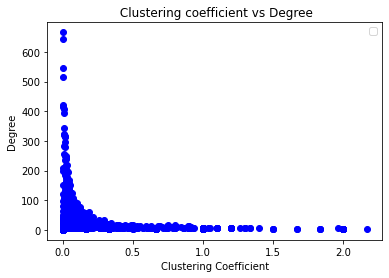

In [59]:
plt.figure()
plt.title(" Clustering coefficient vs Degree")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Degree")
plt.scatter(clust_coef, degrees1,c='blue')
plt.legend()
plt.show()



# Question 4

Taking number of nodes= 620
Maximum number of edges = nodes(nodes-1)/2
Creating undirected and unweighted real-world network using the number of nodes and edges of dataset used in question 1.

In [60]:
max_edges= (620*619)/2
print(max_edges)

191890.0


In [61]:
#Taking random value p
p=58000/191890
print(p)

0.30225650112043356


Creating Adjacency Matrix for 100 instances by taking p as threshold. Random value is generated between 0-1 and if random value generated is less than p, then putting 1 in the current cell of the adjacency matrix else putting 0. Thus creating undirected and unweighted real-world network. After creating adjacency matrix I have calculated degree and degree distribution of the generated ramdon graph and appended degrees of each iteration in the final_degree_list.

Average degree of the network is : 186.9741935483871
Maximum degree is:  227
Minimum degree is:  155


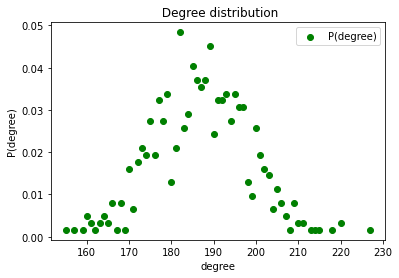

Average degree of the network is : 187.46451612903226
Maximum degree is:  221
Minimum degree is:  149


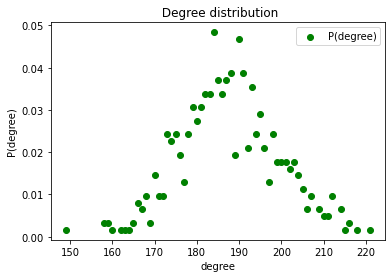

Average degree of the network is : 187.01612903225808
Maximum degree is:  229
Minimum degree is:  156


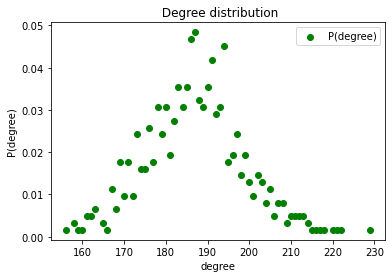

Average degree of the network is : 187.11290322580646
Maximum degree is:  227
Minimum degree is:  144


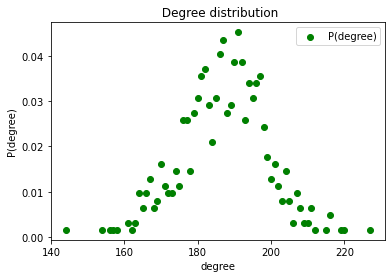

Average degree of the network is : 187.0741935483871
Maximum degree is:  230
Minimum degree is:  150


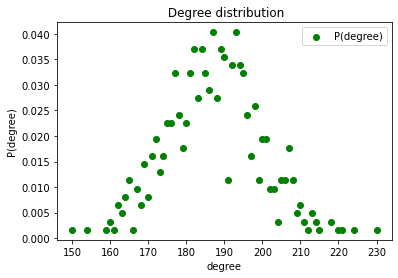

Average degree of the network is : 187.15483870967742
Maximum degree is:  221
Minimum degree is:  151


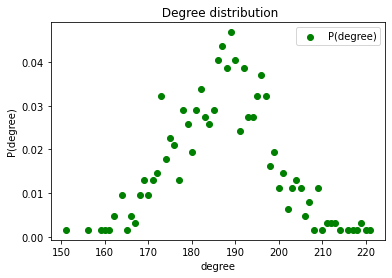

Average degree of the network is : 187.05161290322582
Maximum degree is:  222
Minimum degree is:  155


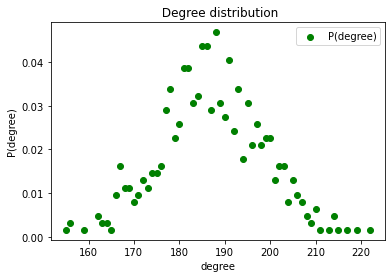

Average degree of the network is : 186.8258064516129
Maximum degree is:  222
Minimum degree is:  155


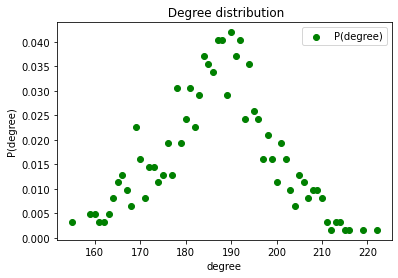

Average degree of the network is : 186.31612903225806
Maximum degree is:  221
Minimum degree is:  150


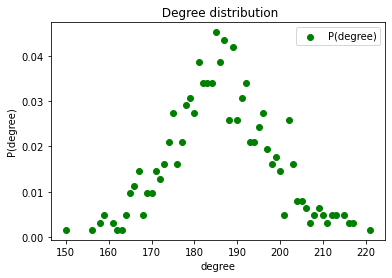

Average degree of the network is : 187.91612903225806
Maximum degree is:  221
Minimum degree is:  152


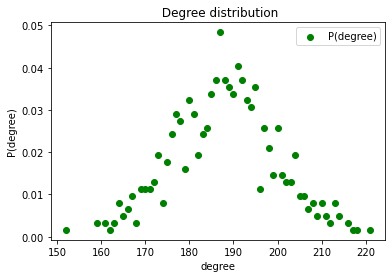

Average degree of the network is : 187.28709677419354
Maximum degree is:  219
Minimum degree is:  152


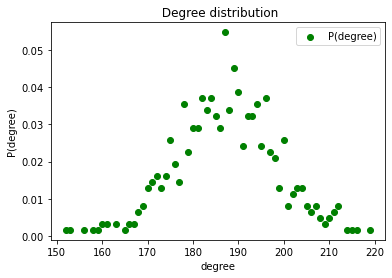

Average degree of the network is : 186.7709677419355
Maximum degree is:  226
Minimum degree is:  146


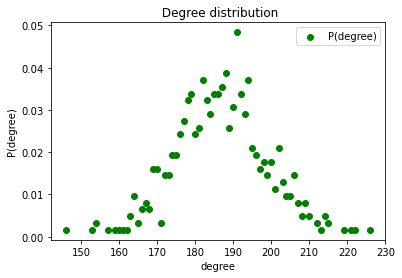

Average degree of the network is : 187.7
Maximum degree is:  227
Minimum degree is:  151


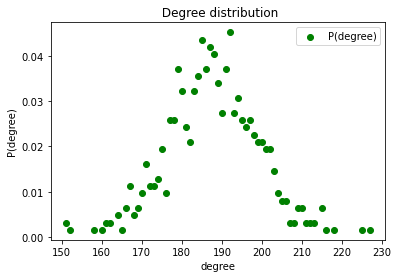

Average degree of the network is : 187.1483870967742
Maximum degree is:  222
Minimum degree is:  143


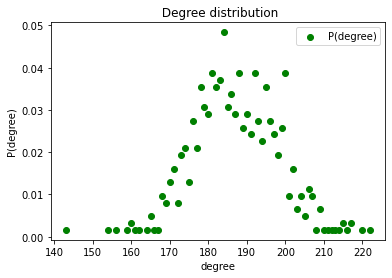

Average degree of the network is : 187.61290322580646
Maximum degree is:  231
Minimum degree is:  145


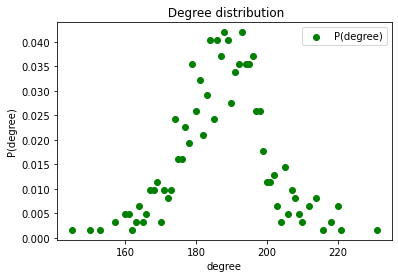

Average degree of the network is : 186.34193548387097
Maximum degree is:  223
Minimum degree is:  157


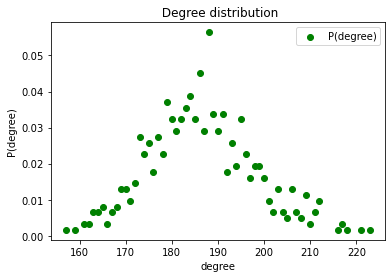

Average degree of the network is : 187.49032258064517
Maximum degree is:  220
Minimum degree is:  156


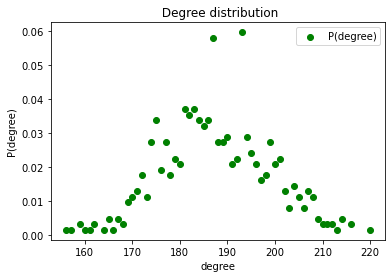

Average degree of the network is : 186.76451612903224
Maximum degree is:  220
Minimum degree is:  154


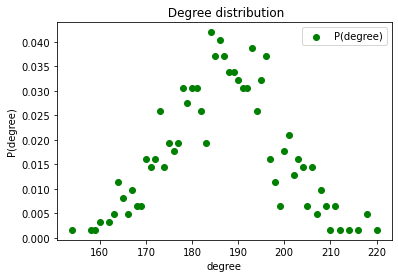

Average degree of the network is : 187.61935483870968
Maximum degree is:  228
Minimum degree is:  148


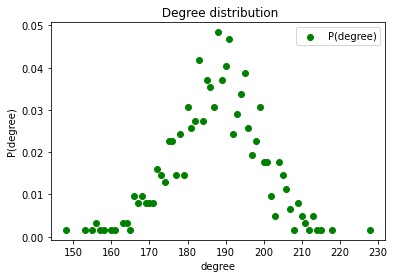

Average degree of the network is : 187.00645161290322
Maximum degree is:  221
Minimum degree is:  152


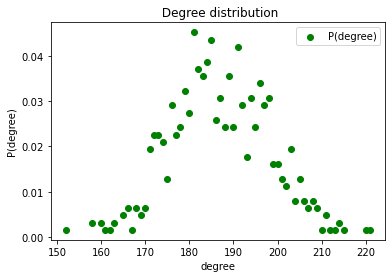

Average degree of the network is : 186.39354838709679
Maximum degree is:  218
Minimum degree is:  150


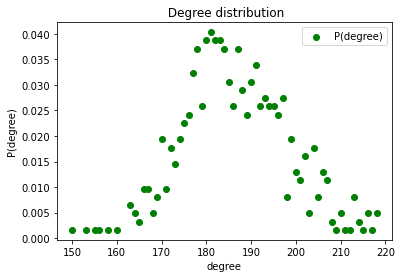

Average degree of the network is : 186.90322580645162
Maximum degree is:  223
Minimum degree is:  159


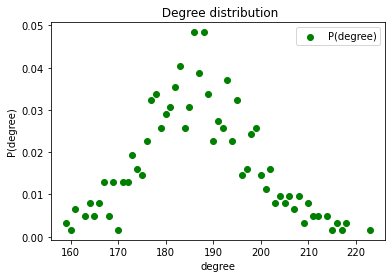

Average degree of the network is : 186.38387096774193
Maximum degree is:  221
Minimum degree is:  154


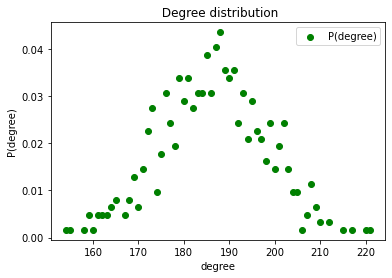

Average degree of the network is : 187.09677419354838
Maximum degree is:  223
Minimum degree is:  146


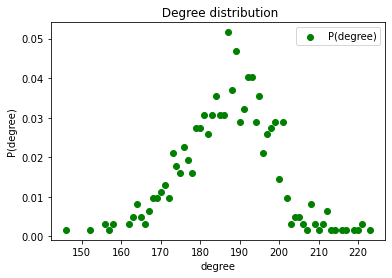

Average degree of the network is : 187.73225806451612
Maximum degree is:  223
Minimum degree is:  157


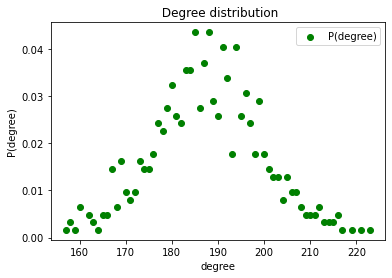

Average degree of the network is : 188.05483870967743
Maximum degree is:  221
Minimum degree is:  157


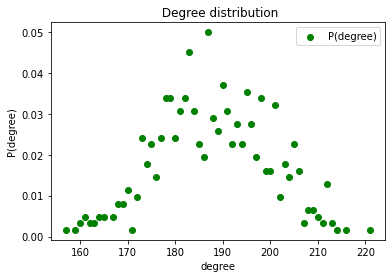

Average degree of the network is : 187.80322580645162
Maximum degree is:  224
Minimum degree is:  153


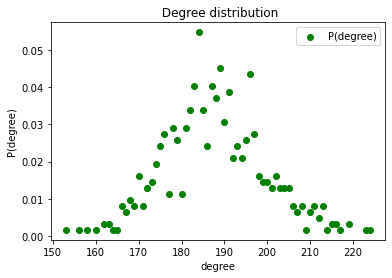

Average degree of the network is : 187.13548387096773
Maximum degree is:  223
Minimum degree is:  150


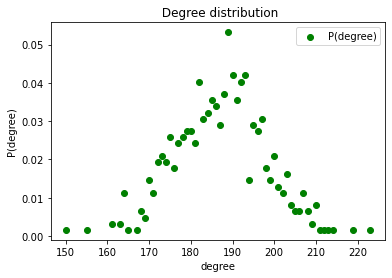

Average degree of the network is : 187.93870967741935
Maximum degree is:  221
Minimum degree is:  150


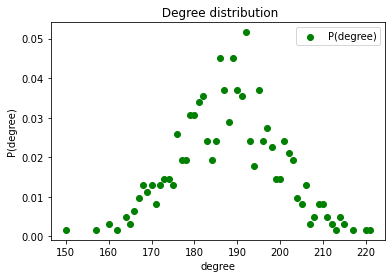

Average degree of the network is : 187.73548387096776
Maximum degree is:  226
Minimum degree is:  150


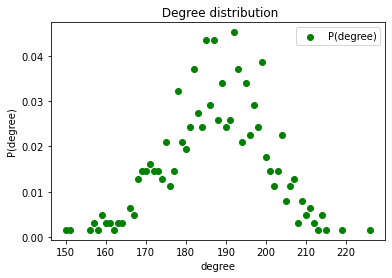

Average degree of the network is : 188.08387096774194
Maximum degree is:  218
Minimum degree is:  157


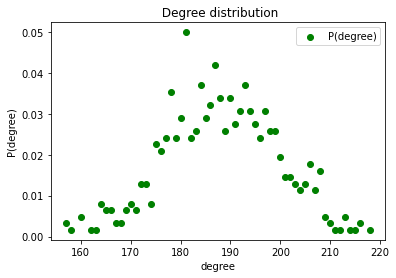

Average degree of the network is : 186.94516129032257
Maximum degree is:  222
Minimum degree is:  148


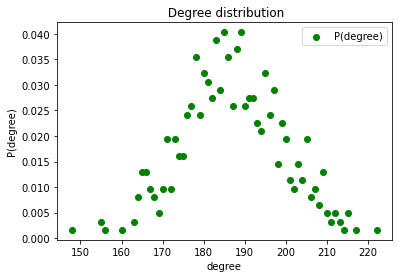

Average degree of the network is : 188.1741935483871
Maximum degree is:  226
Minimum degree is:  154


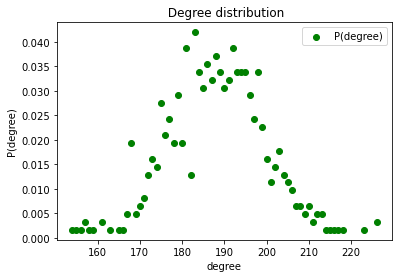

Average degree of the network is : 187.41290322580645
Maximum degree is:  230
Minimum degree is:  155


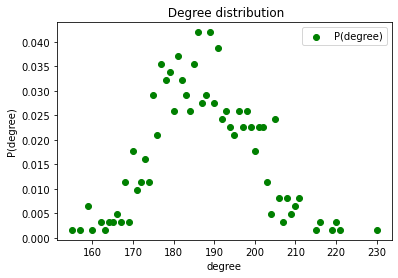

Average degree of the network is : 187.65806451612903
Maximum degree is:  222
Minimum degree is:  155


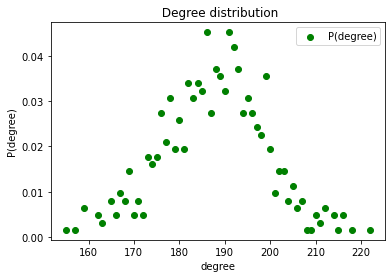

Average degree of the network is : 186.6290322580645
Maximum degree is:  229
Minimum degree is:  157


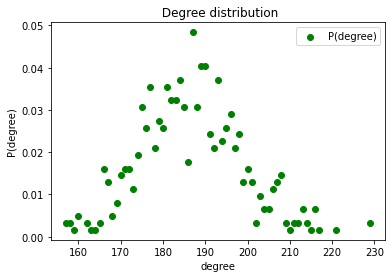

Average degree of the network is : 187.0774193548387
Maximum degree is:  215
Minimum degree is:  150


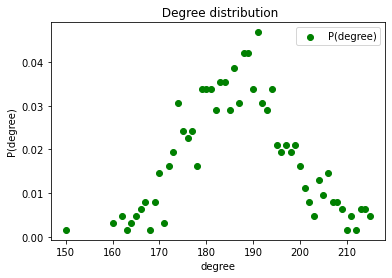

Average degree of the network is : 187.3258064516129
Maximum degree is:  220
Minimum degree is:  154


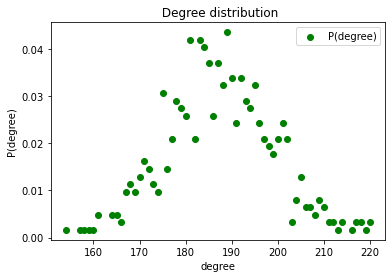

Average degree of the network is : 187.94193548387096
Maximum degree is:  224
Minimum degree is:  150


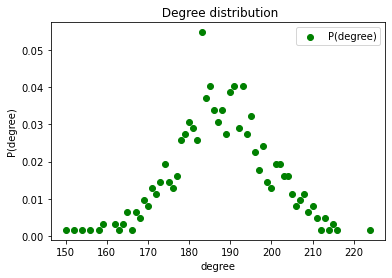

Average degree of the network is : 186.95806451612904
Maximum degree is:  215
Minimum degree is:  142


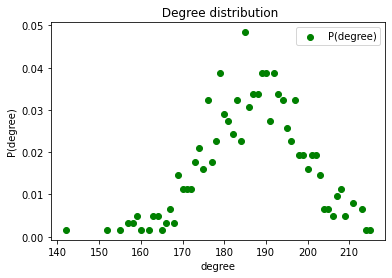

Average degree of the network is : 186.92903225806452
Maximum degree is:  228
Minimum degree is:  149


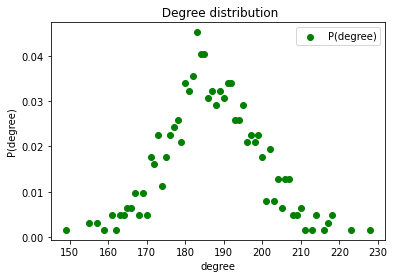

Average degree of the network is : 186.20322580645163
Maximum degree is:  219
Minimum degree is:  152


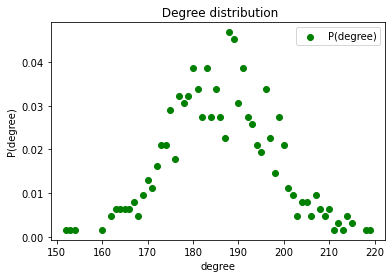

Average degree of the network is : 186.35806451612902
Maximum degree is:  222
Minimum degree is:  155


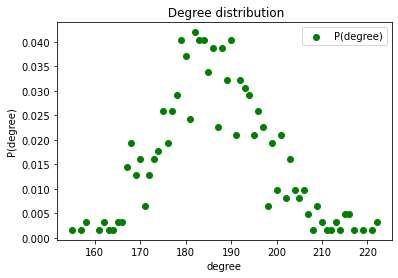

Average degree of the network is : 187.44193548387096
Maximum degree is:  225
Minimum degree is:  151


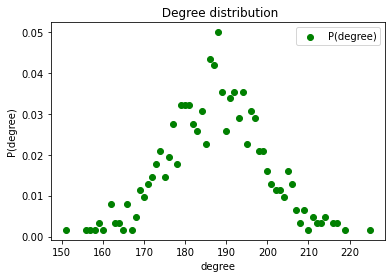

Average degree of the network is : 187.63225806451612
Maximum degree is:  227
Minimum degree is:  159


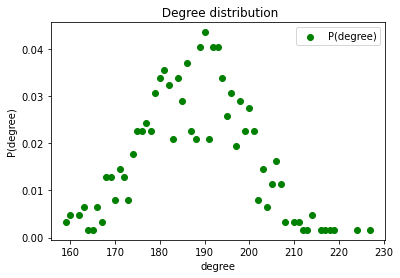

Average degree of the network is : 187.28709677419354
Maximum degree is:  228
Minimum degree is:  155


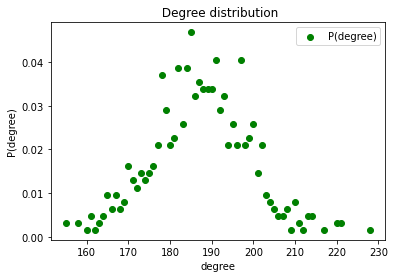

Average degree of the network is : 187.80967741935484
Maximum degree is:  225
Minimum degree is:  160


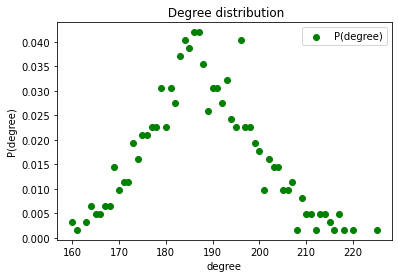

Average degree of the network is : 187.05806451612904
Maximum degree is:  227
Minimum degree is:  154


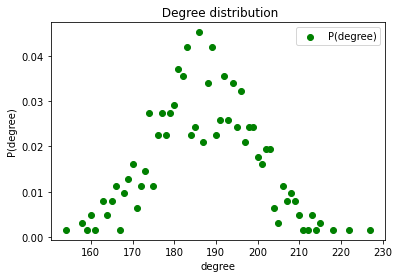

Average degree of the network is : 186.21290322580646
Maximum degree is:  219
Minimum degree is:  154


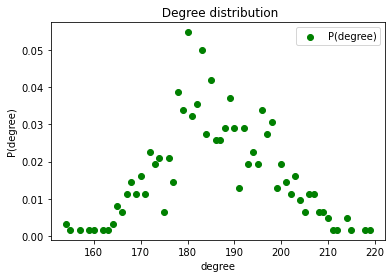

Average degree of the network is : 186.6451612903226
Maximum degree is:  225
Minimum degree is:  151


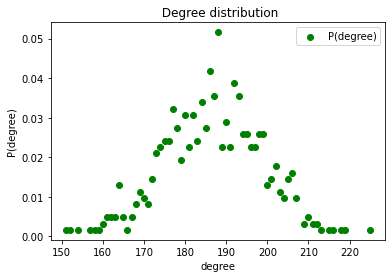

Average degree of the network is : 186.9225806451613
Maximum degree is:  219
Minimum degree is:  151


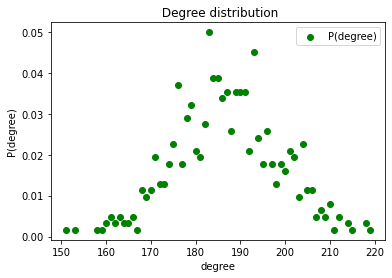

Average degree of the network is : 187.03548387096774
Maximum degree is:  230
Minimum degree is:  156


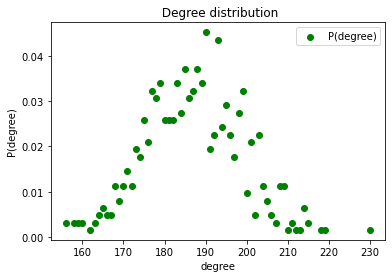

Average degree of the network is : 186.34516129032258
Maximum degree is:  224
Minimum degree is:  152


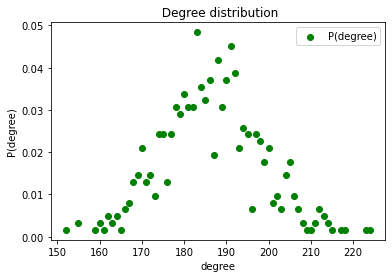

Average degree of the network is : 186.69032258064516
Maximum degree is:  226
Minimum degree is:  153


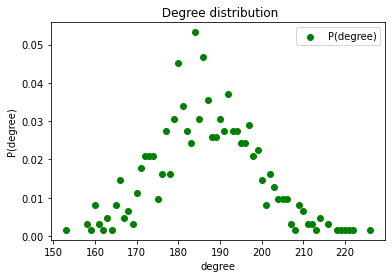

Average degree of the network is : 187.58387096774194
Maximum degree is:  224
Minimum degree is:  145


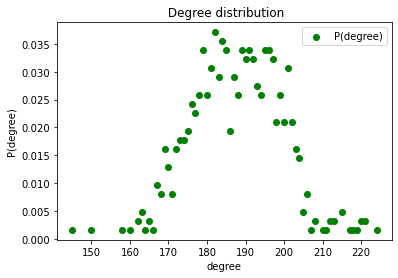

Average degree of the network is : 186.58064516129033
Maximum degree is:  218
Minimum degree is:  155


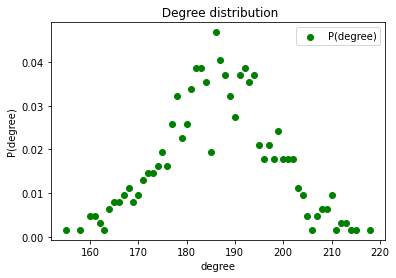

Average degree of the network is : 186.86774193548388
Maximum degree is:  226
Minimum degree is:  153


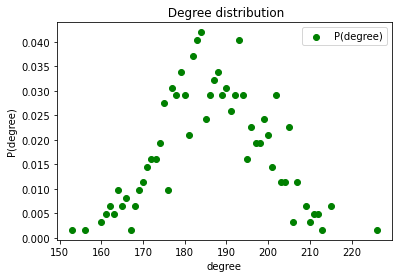

Average degree of the network is : 187.34516129032258
Maximum degree is:  217
Minimum degree is:  155


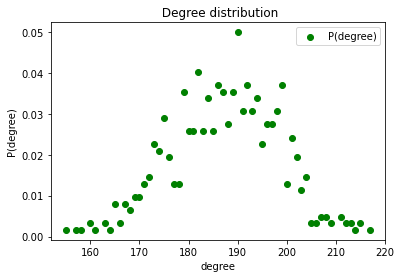

Average degree of the network is : 187.11290322580646
Maximum degree is:  223
Minimum degree is:  153


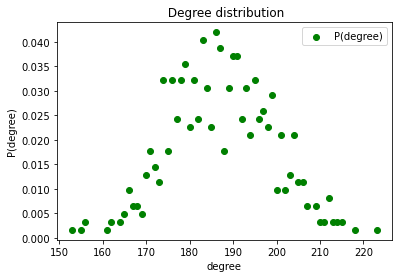

Average degree of the network is : 186.89354838709679
Maximum degree is:  222
Minimum degree is:  155


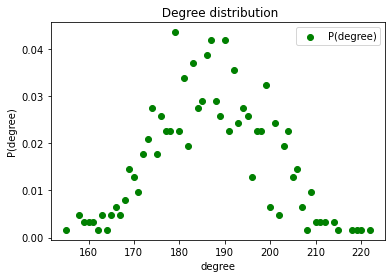

Average degree of the network is : 186.93548387096774
Maximum degree is:  219
Minimum degree is:  154


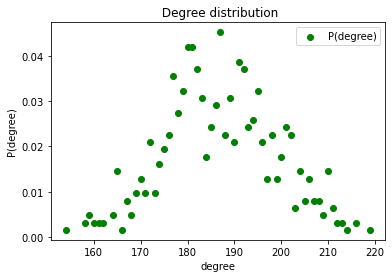

Average degree of the network is : 187.7774193548387
Maximum degree is:  224
Minimum degree is:  151


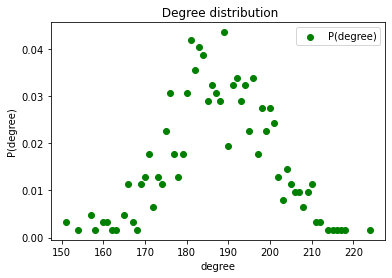

Average degree of the network is : 187.90322580645162
Maximum degree is:  226
Minimum degree is:  157


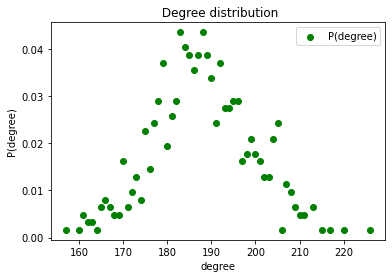

Average degree of the network is : 187.20645161290324
Maximum degree is:  224
Minimum degree is:  151


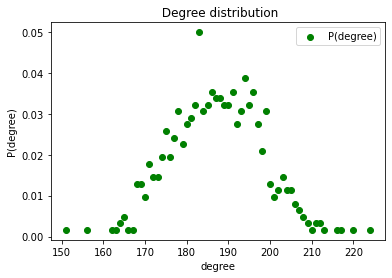

Average degree of the network is : 187.03548387096774
Maximum degree is:  219
Minimum degree is:  158


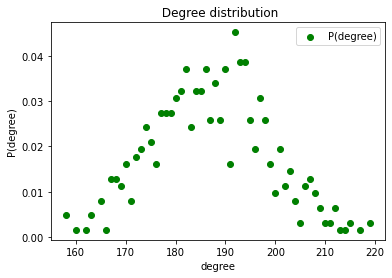

Average degree of the network is : 186.53225806451613
Maximum degree is:  215
Minimum degree is:  148


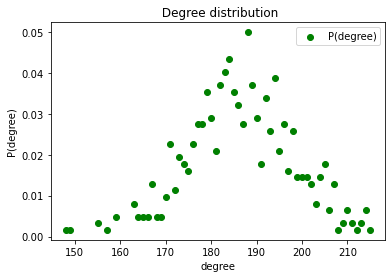

Average degree of the network is : 185.6258064516129
Maximum degree is:  221
Minimum degree is:  148


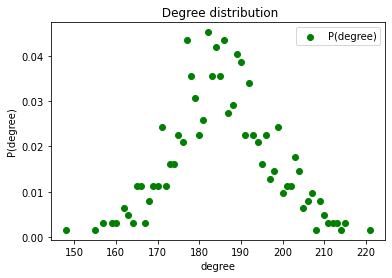

Average degree of the network is : 187.1451612903226
Maximum degree is:  222
Minimum degree is:  149


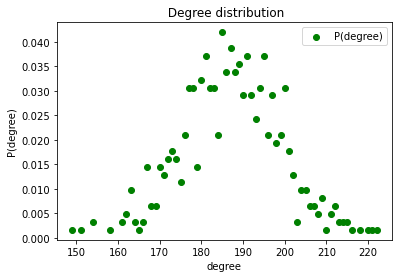

Average degree of the network is : 187.67741935483872
Maximum degree is:  222
Minimum degree is:  149


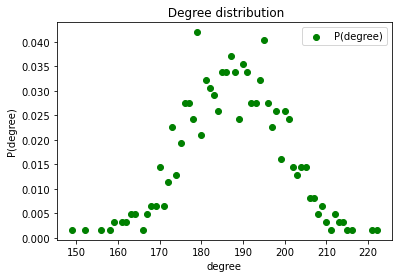

Average degree of the network is : 187.59354838709677
Maximum degree is:  226
Minimum degree is:  150


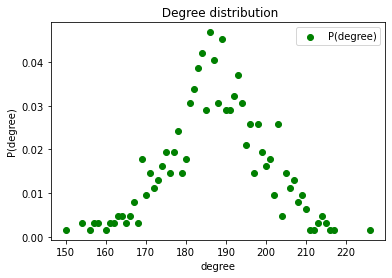

Average degree of the network is : 186.7290322580645
Maximum degree is:  220
Minimum degree is:  150


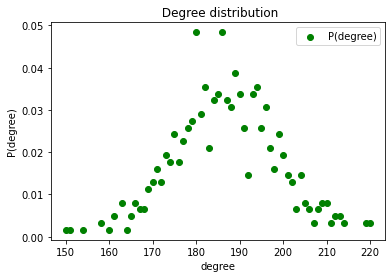

Average degree of the network is : 186.3967741935484
Maximum degree is:  221
Minimum degree is:  157


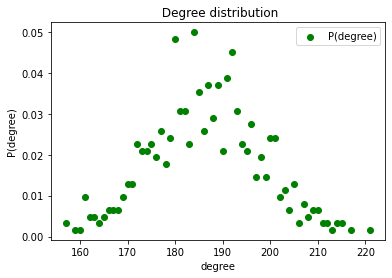

Average degree of the network is : 186.8741935483871
Maximum degree is:  227
Minimum degree is:  151


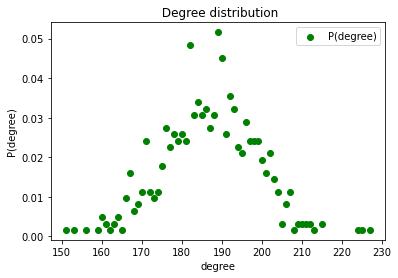

Average degree of the network is : 186.28709677419354
Maximum degree is:  231
Minimum degree is:  150


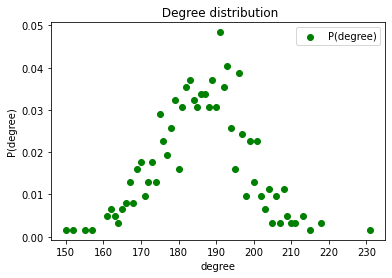

Average degree of the network is : 185.4774193548387
Maximum degree is:  216
Minimum degree is:  148


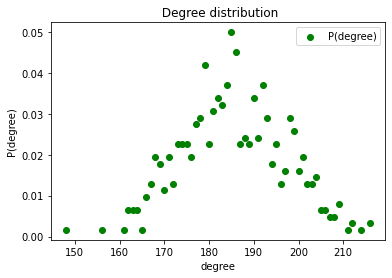

Average degree of the network is : 186.5193548387097
Maximum degree is:  222
Minimum degree is:  158


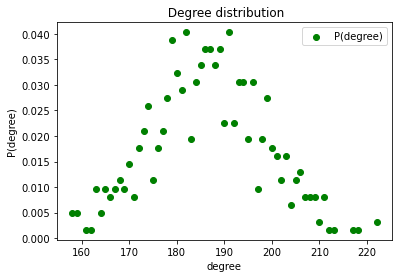

Average degree of the network is : 187.4
Maximum degree is:  227
Minimum degree is:  154


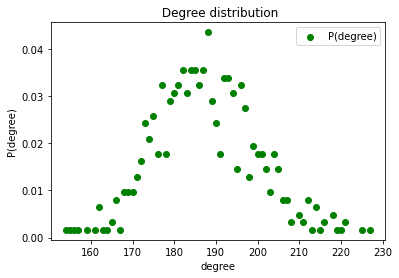

Average degree of the network is : 186.99354838709678
Maximum degree is:  231
Minimum degree is:  153


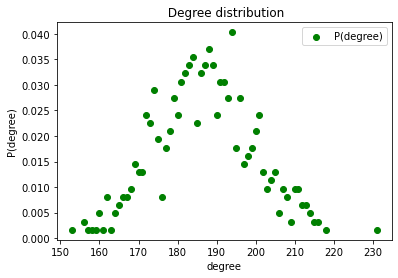

Average degree of the network is : 187.3548387096774
Maximum degree is:  223
Minimum degree is:  150


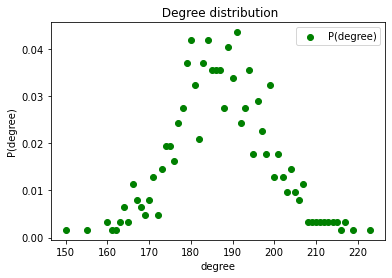

Average degree of the network is : 187.41935483870967
Maximum degree is:  224
Minimum degree is:  153


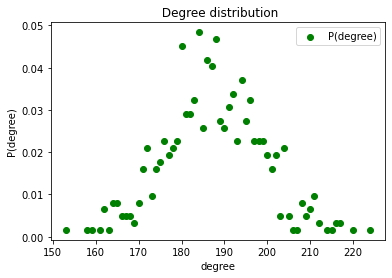

Average degree of the network is : 186.90322580645162
Maximum degree is:  223
Minimum degree is:  154


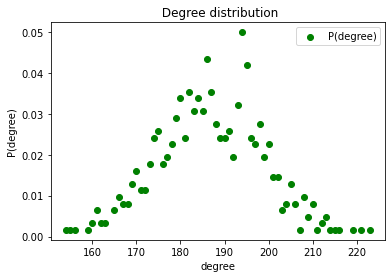

Average degree of the network is : 186.26129032258063
Maximum degree is:  226
Minimum degree is:  153


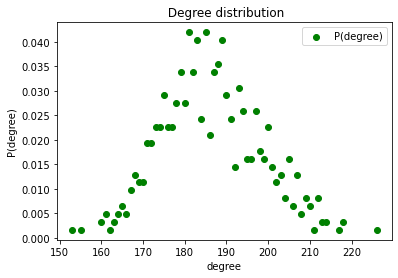

Average degree of the network is : 186.08387096774194
Maximum degree is:  219
Minimum degree is:  143


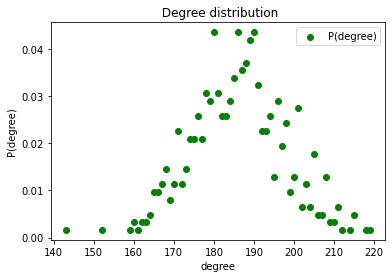

Average degree of the network is : 187.2516129032258
Maximum degree is:  220
Minimum degree is:  153


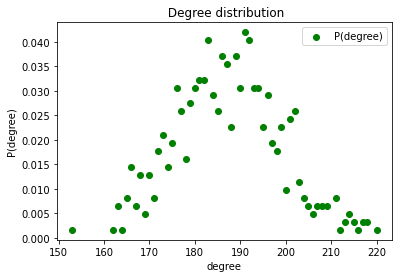

Average degree of the network is : 187.0225806451613
Maximum degree is:  215
Minimum degree is:  154


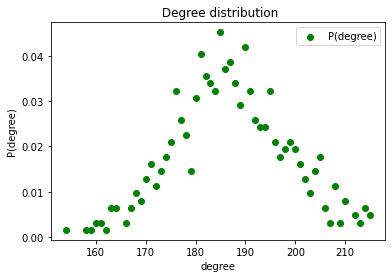

Average degree of the network is : 186.36129032258066
Maximum degree is:  223
Minimum degree is:  153


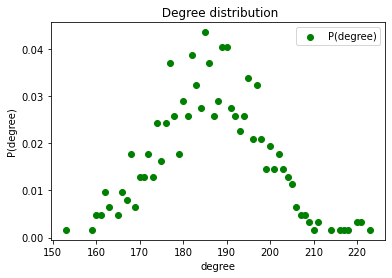

Average degree of the network is : 187.57096774193548
Maximum degree is:  218
Minimum degree is:  153


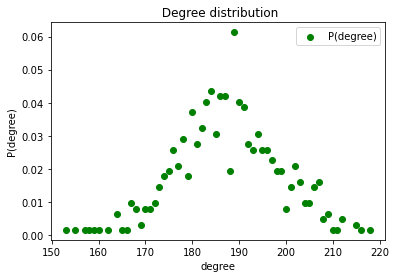

Average degree of the network is : 186.6451612903226
Maximum degree is:  225
Minimum degree is:  155


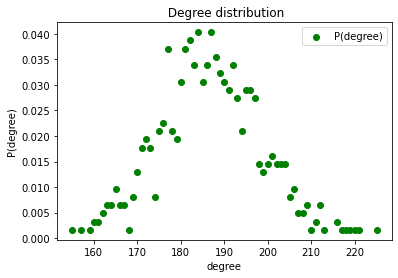

Average degree of the network is : 187.49032258064517
Maximum degree is:  224
Minimum degree is:  157


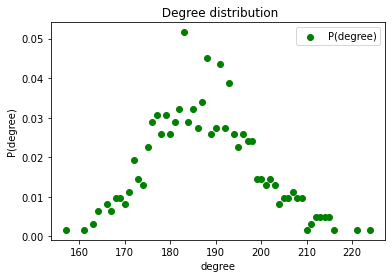

Average degree of the network is : 186.7483870967742
Maximum degree is:  227
Minimum degree is:  152


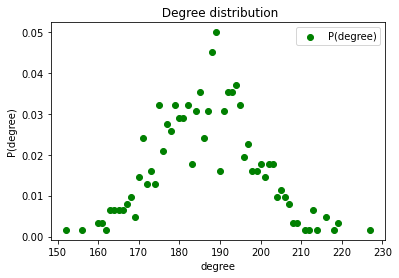

Average degree of the network is : 187.48709677419356
Maximum degree is:  220
Minimum degree is:  152


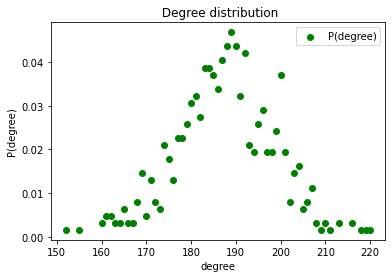

Average degree of the network is : 186.75806451612902
Maximum degree is:  219
Minimum degree is:  151


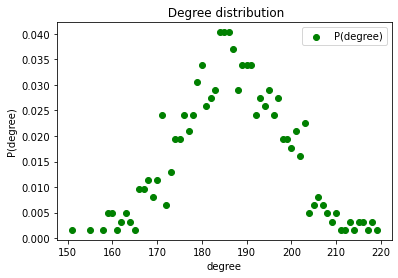

Average degree of the network is : 187.4741935483871
Maximum degree is:  229
Minimum degree is:  156


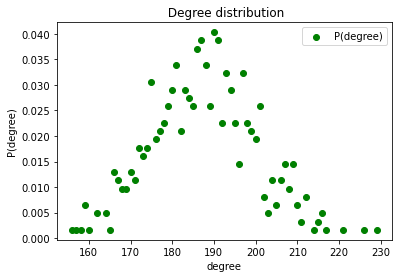

Average degree of the network is : 186.28709677419354
Maximum degree is:  218
Minimum degree is:  148


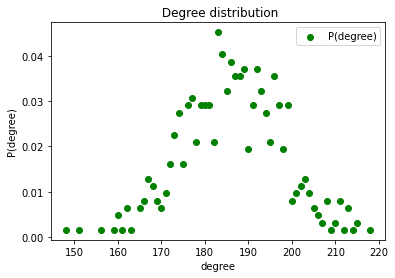

Average degree of the network is : 188.01612903225808
Maximum degree is:  221
Minimum degree is:  150


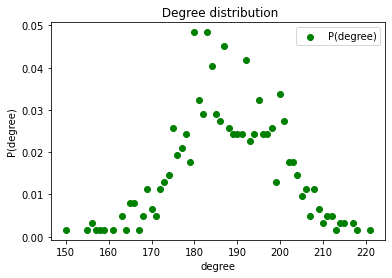

Average degree of the network is : 186.1
Maximum degree is:  219
Minimum degree is:  130


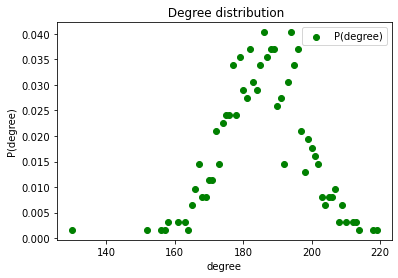

Average degree of the network is : 187.01612903225808
Maximum degree is:  225
Minimum degree is:  150


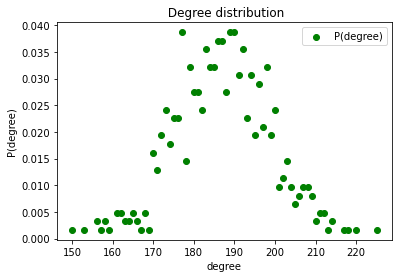

Average degree of the network is : 186.15806451612903
Maximum degree is:  223
Minimum degree is:  156


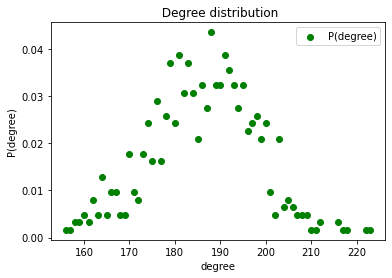

Average degree of the network is : 186.6516129032258
Maximum degree is:  217
Minimum degree is:  153


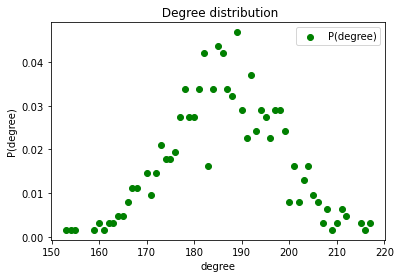

Average degree of the network is : 187.38387096774193
Maximum degree is:  224
Minimum degree is:  151


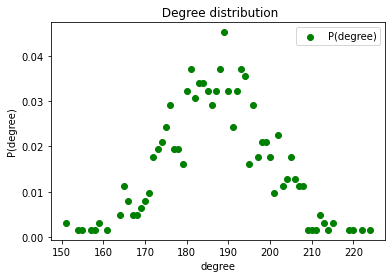

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
nodes_taken=620
final_degree_list=[]
for inst in range(100):
    adjacency_matrix3=np.zeros((nodes_taken,nodes_taken))
    for i in range(620):
        for j in range(i+1,620):
            random_val=random.uniform(0,1)
            if random_val<p:
                adjacency_matrix3[i][j]=1
                adjacency_matrix3[j][i]=1
            else:
                adjacency_matrix3[i][j]=0
                adjacency_matrix3[j][i]=0
    degrees=[]
    #degree corresponding to each node
    degree_dict={}
    c=0
    for i in adjacency_matrix3:
        deg=list(i).count(1)
        degrees.append(deg)
        degree_dict[c]=deg
        c=c+1
    print("Average degree of the network is :",sum(degrees)/620 )
    
    degree_distribution1={}
    for degree in degrees:
        if degree not in degree_distribution1.keys():
            prob=degrees.count(degree)/620
            degree_distribution1[degree]=prob
    print("Maximum degree is: ",max(degrees))
    print("Minimum degree is: ",min(degrees))
    
    plot_x=list(degree_distribution1.keys())
    plot_y=list(degree_distribution1.values())
    final_degree_list.append(degree_distribution1)
    indexes=np.argsort(plot_x)
    x,y=[],[]

    for index in indexes:
        x.append(plot_x[index])
        y.append(plot_y[index])
    plt.figure()
    plt.title(" Degree distribution")
    plt.xlabel("degree")
    plt.ylabel("P(degree)")
    plt.scatter(x, y,c='green',label='P(degree)')
    plt.legend()
    plt.show()

Taking scaled mean and standard deviation of degree distibution for 100 instances for comparision of graphs

In [74]:
scaled_mean_degree={}
for i in range(140,230):
    temp=[]
    for dict1 in final_degree_list:
        if i in dict1:
            temp.append(dict1[i])
    if len(temp)!=0:
        scaled_mean_degree[i]=np.mean(temp)
    else:
        scaled_mean_degree[i]=0
        


In [64]:
scaled_std_deviation={}
for i in range(140,230):
    temp=[]
    for dict1 in final_degree_list:
        if i in dict1:
            temp.append(dict1[i])
    if len(temp)!=0:
        scaled_std_deviation[i]=np.std(temp)
    else:
        scaled_std_deviation[i]=0
        


# Plotting Degree Distribution

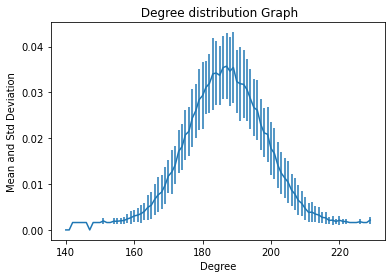

In [65]:
  
# example data 
x=[]
for i in range(140,230):
    x.append(i)
xval = scaled_mean_degree.values()
yval = scaled_std_deviation.values() 

plt.errorbar(x, scaled_mean_degree.values(), yerr = scaled_std_deviation.values() )
plt.title(" Degree distribution Graph")
plt.xlabel("Degree")
plt.ylabel("Mean and Std Deviation")
plt.show() 

# Question 5
I have imported different layouts for all the networks taken in question 1,2 and 3. As the graphs are very dense it is quite difficult to visualize them using cystoscpe

# Layouts for Question 1
Prefuse Force Directed layout

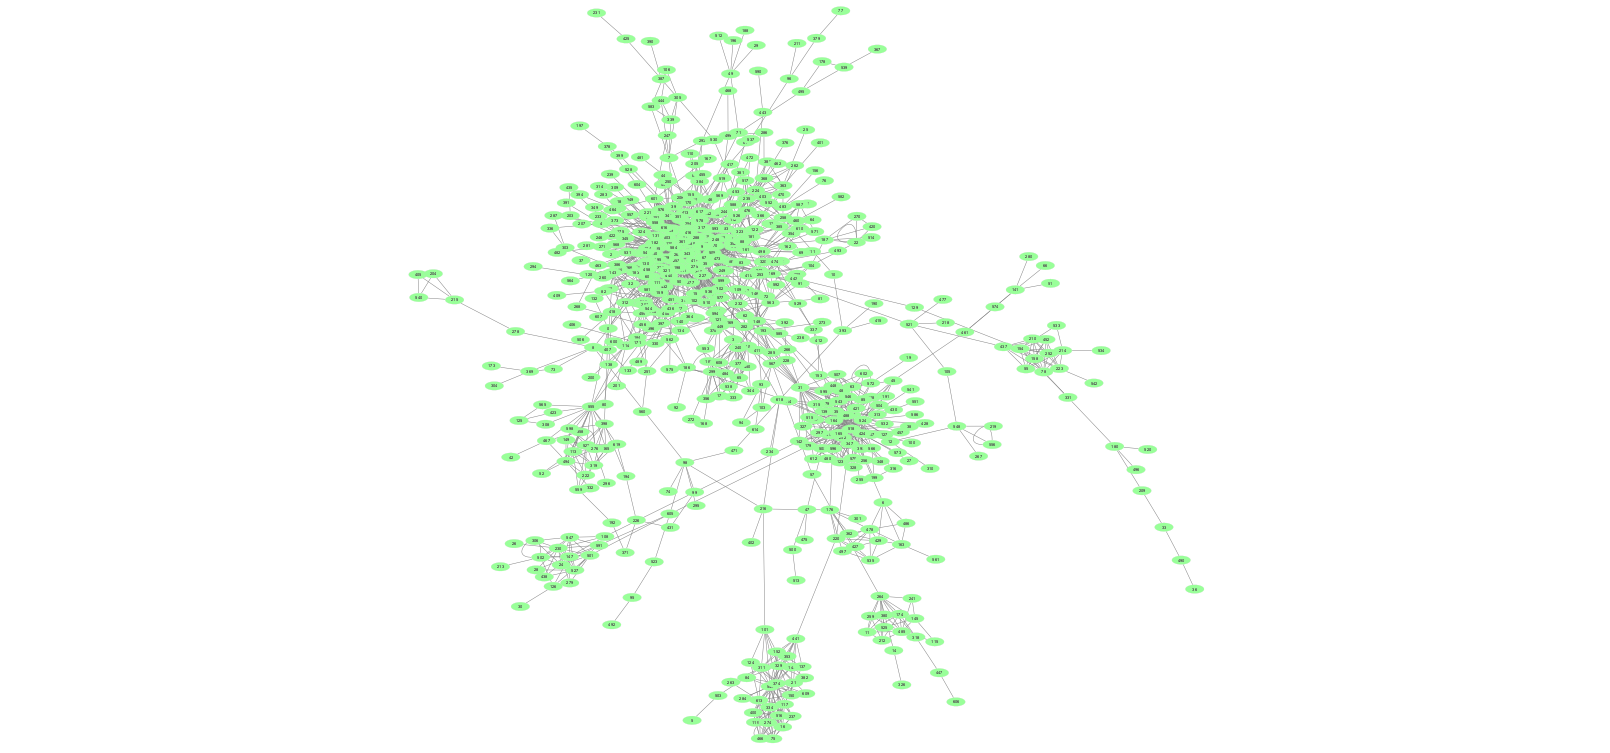

In [66]:
from IPython.display import Image
Image(filename='fb_food.csv.png')
# We can see that the given network is very sparses

Prefuse Force OpenCl Directed layout

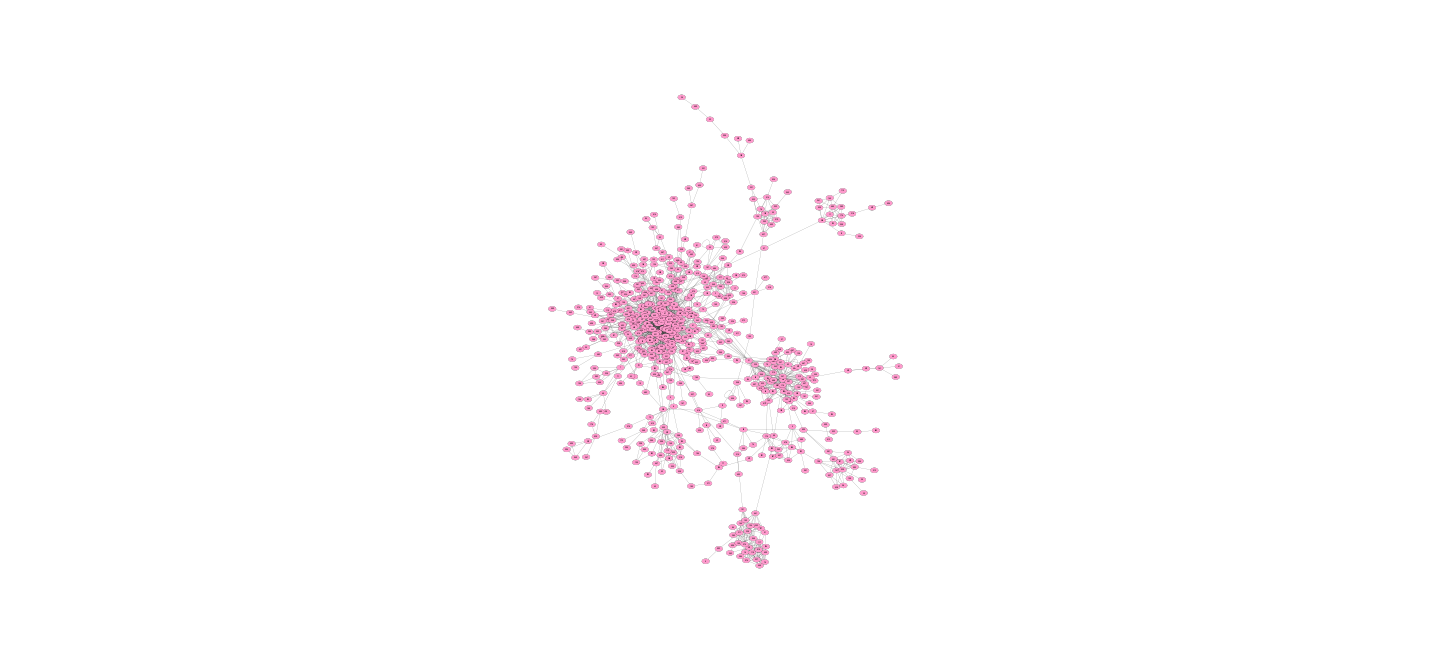

In [67]:
Image(filename='food.edges_opencl.png')

Grid Layout

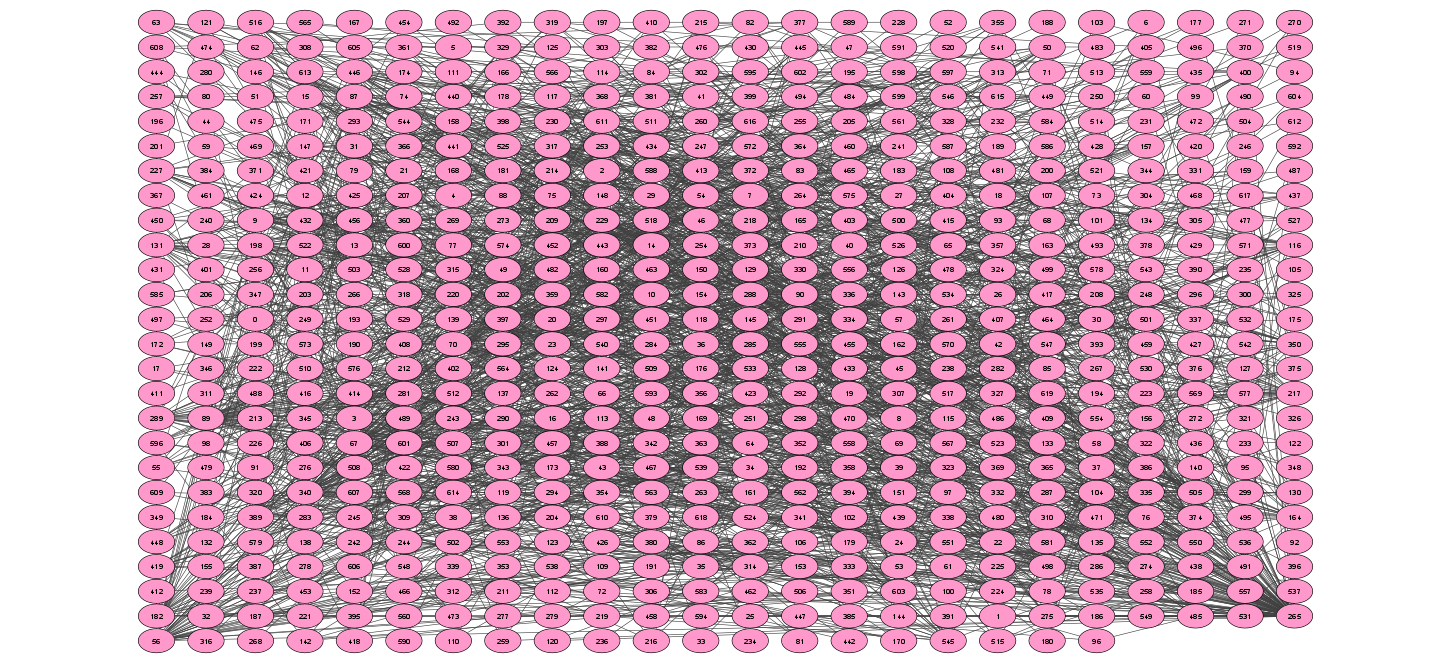

In [68]:
Image(filename='food.edges_grid.png')

# Layouts for Question 2
Prefuse Force Directed layout

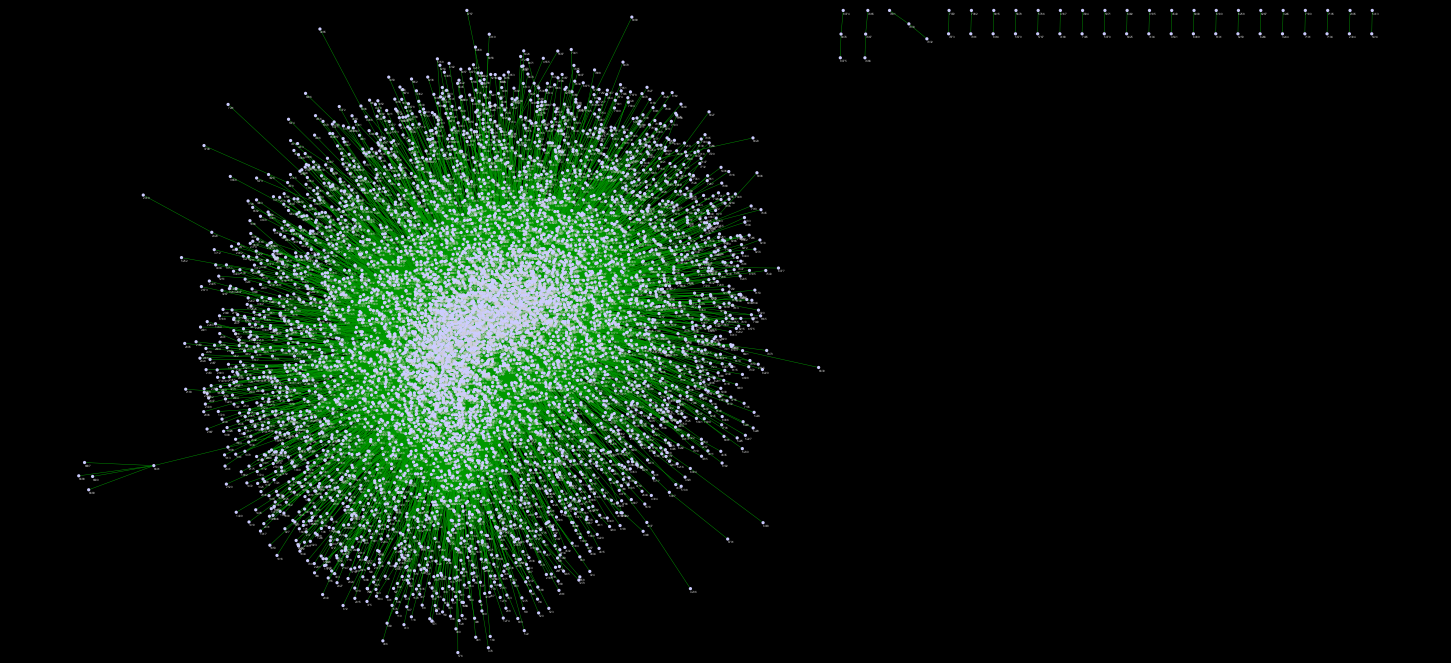

In [69]:
Image(filename='wiki_vote_simple.png')

Circular Layout

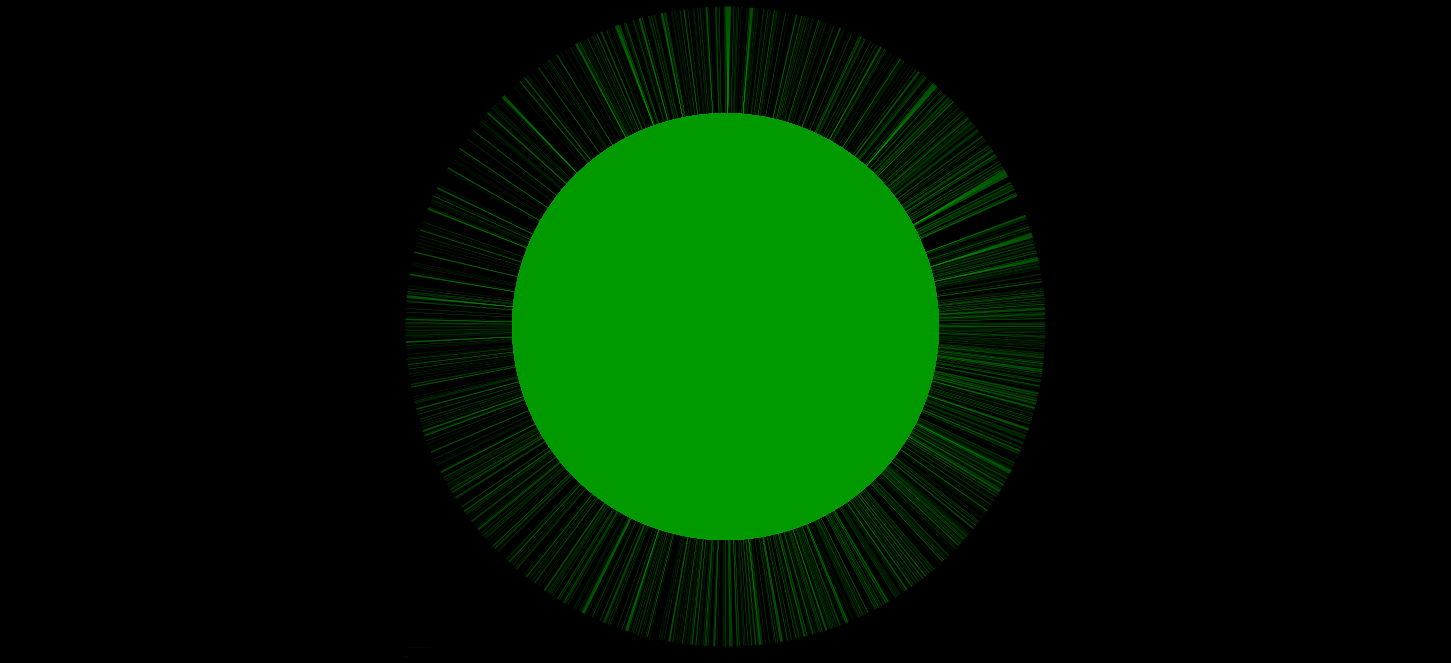

In [70]:
Image(filename='wiki_vote_circle.png')

# Layouts for Question 3
Prefuse Force Directed layout

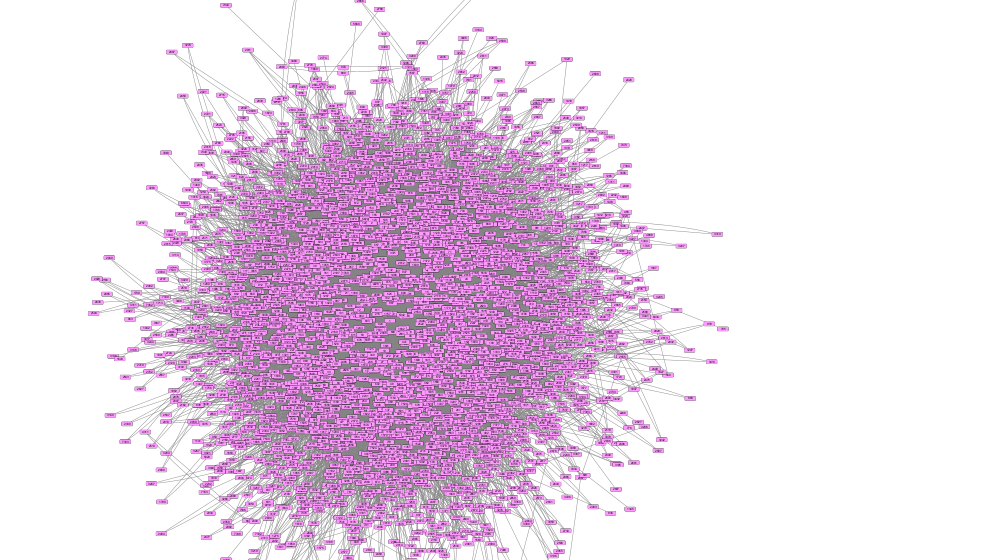

In [71]:
Image(filename='soc-sign-bitcoinalpha1.csv.png')

Grid Layout

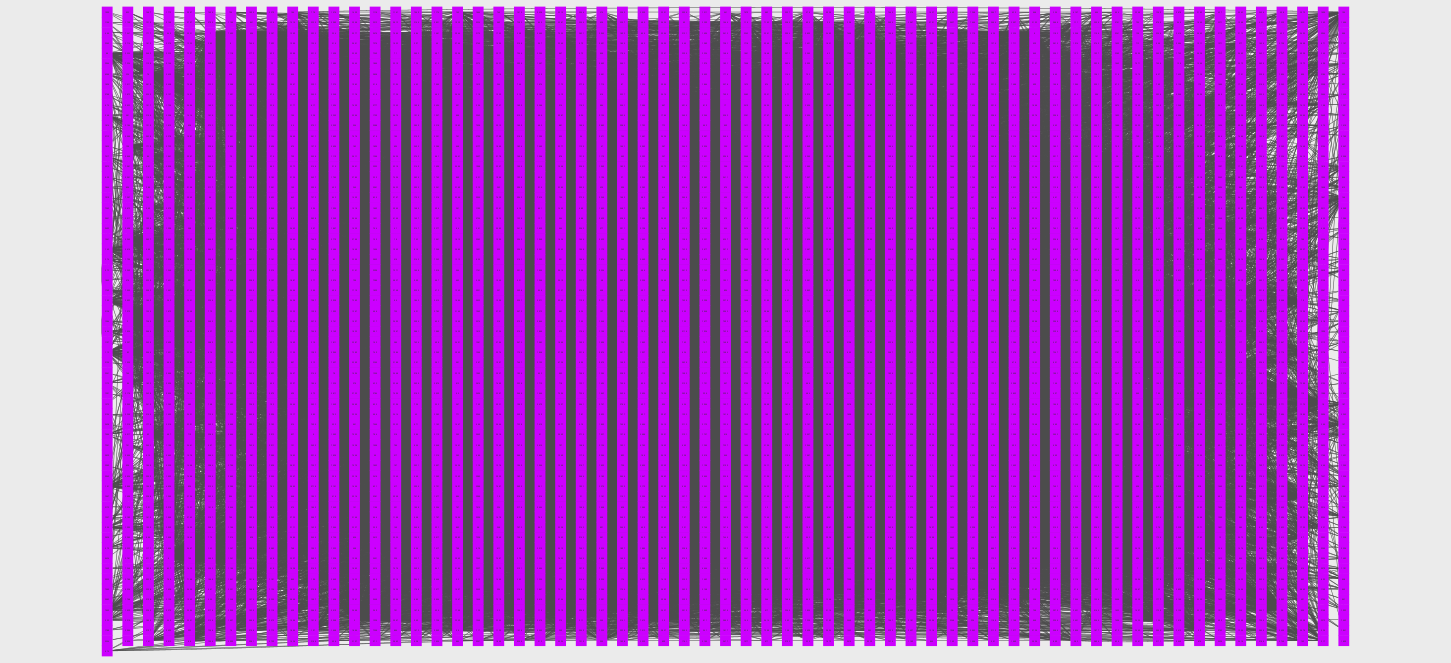

In [72]:
Image(filename='alpha_coin_grid.png')

Degree sorted layout

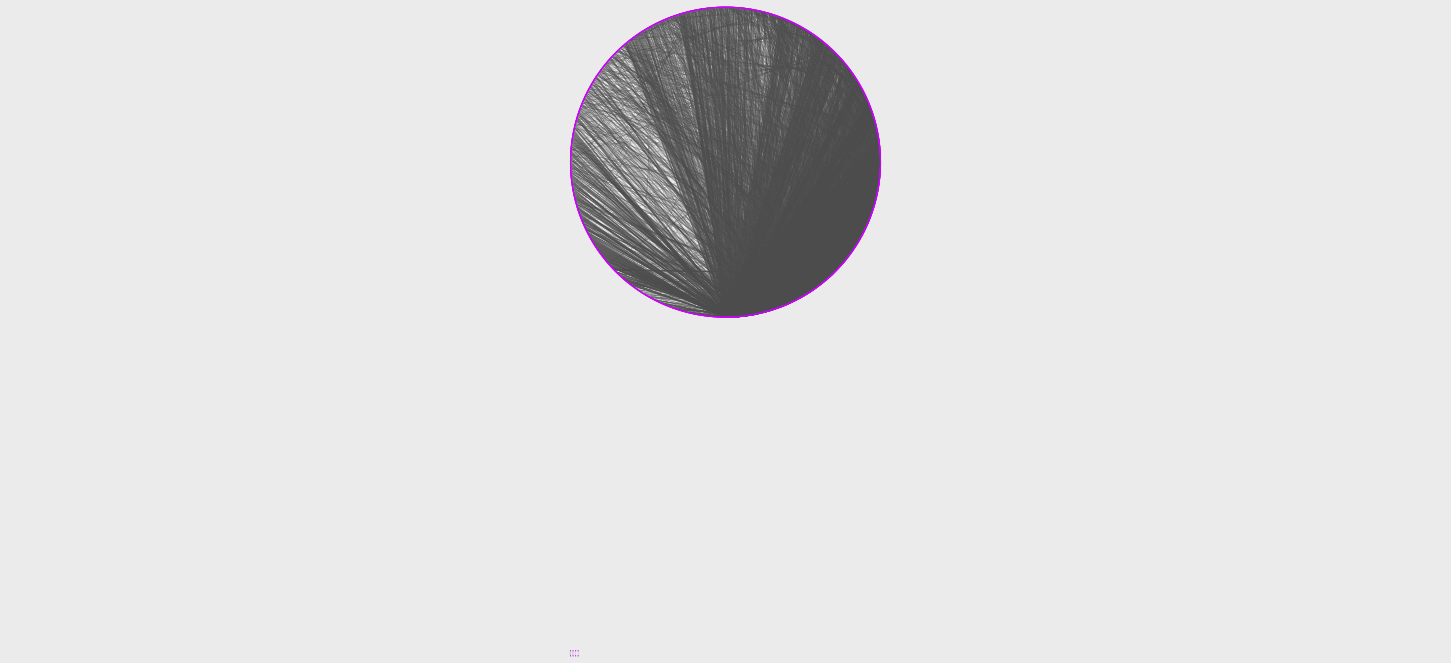

In [73]:
Image(filename='alphacoin_degreesortes.png')